## [San Francisco Crime Classification(Kaggle)](https://www.kaggle.com/c/sf-crime)

In [48]:
import pandas as pd
import numpy as np
from IPython.display import Image, display
import matplotlib.pyplot as plt
%matplotlib inline

#### Load train and test data from csv files.

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#### Observe top 2 records just as a matter of data preview.

In [3]:
train.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


#### Get more detailed statistics for all features.

In [4]:
train.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
count,878049,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000
unique,389257,39,879,7,10,17,23228,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,185,174900,60022,133734,157182,526790,26533,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.416420,37.775421
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.406959,37.784369


#### Some features have smaller set of values. Meaning they are categorical by nature so it's better convert them to [pandas category type](https://pandas-docs.github.io/pandas-docs-travis/categorical.html).

In [5]:
train.Category = train.Category.astype('category')
train.DayOfWeek = train.DayOfWeek.astype('category')
train.PdDistrict = train.PdDistrict.astype('category')
train.Resolution = train.Resolution.astype('category')

Y is the Latitude and X - Longitude. Would be better to rename those features to avoid confusion.

In [6]:
train['Longitude'] = train.X
train['Latitude'] = train.Y
train = train.drop(['X', 'Y'], axis = 1)
train.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Longitude,Latitude
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


#### Describe shows maximum Latitude value is 90. This is suspicious since 90 should be somewhere in the North Pole. Looks like an invalid data entry. Let's how many such entries are there. 

In [7]:
train[train.Latitude == 90].describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Longitude,Latitude
count,67,67,67,67,67,67,67,67.0,67
unique,56,14,35,7,10,7,41,NaN,NaN
top,2004-06-24 00:03:00,OTHER OFFENSES,GRAND THEFT FROM LOCKED AUTO,Wednesday,TENDERLOIN,NONE,AUSTIN ST / LARKIN ST,NaN,NaN
freq,2,17,9,11,15,33,6,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-120.5,90
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-120.5,90
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-120.5,90
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-120.5,90
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-120.5,90


#### 67 of them! There are several approaches how to deal with this broken feature. For now, I am going exclude them.

In [8]:
train = train.drop(train[train.Latitude == 90].index)

In [9]:
train.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Longitude,Latitude
count,877982,877982,877982,877982,877982,877982,877982,877982.000000,877982.000000
unique,389229,39,879,7,10,17,23191,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,185,174885,60013,133723,157174,526757,26533,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422763,37.767035
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025285,0.024165
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.416420,37.775421
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.406959,37.784368


In [10]:
ct = pd.crosstab(train.Category, train.DayOfWeek)

### Word cloud of crime categories.

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

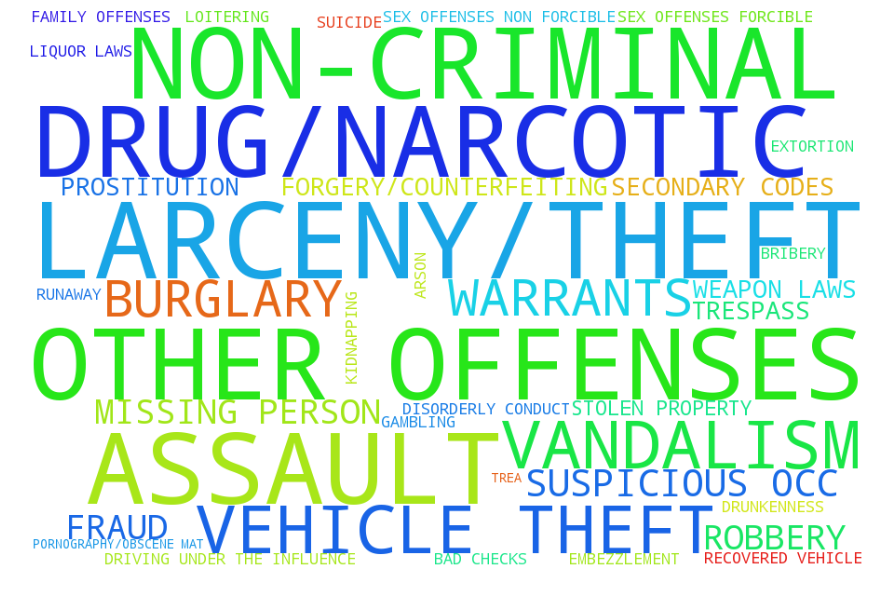

In [55]:
plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=900, height=600, background_color='white')\
.generate_from_frequencies(train.groupby(['Category']).count().Dates.iteritems())
img=plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

## Baseline model

It's time to create a baseline model. This should be a simple model used to calculate baseline accuracy. 

Let's take for the baseline model an assumption that crime category doesn't depend on any features and its values is always the most frequent category. The most popular is **LARCENY/THEFT**

In [13]:
train.groupby(['Category']).count().sort_values('Dates', ascending=False).head(1)

,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,Longitude,Latitude
Category,,,,,,,,
LARCENY/THEFT,174885,174885,174885,174885,174885,174885,174885,174885


In [14]:
test['Category'] = 'LARCENY/THEFT'

In [15]:
test.head(2)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Category
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,LARCENY/THEFT
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,LARCENY/THEFT


In [46]:
testToWrite = pd.DataFrame(0, index=np.arange(len(test)), columns=sorted(train.Category.astype(str).unique()))
testToWrite.index.name = 'Id'
testToWrite['LARCENY/THEFT'] = 1
testToWrite.head(2)

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
testToWrite.to_csv('baseline.csv', sep=',', index=True)

Kaggle estimated accuracy of the baseline model is **27.62709** which landed me on **1261** position.
![alt text](https://raw.githubusercontent.com/stormy-ua/Kaggle/master/SanFranciscoCrime/images/BaselineKaggle.png)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
heatmap = ax.pcolor(ct, cmap=plt.cm.Blues)
ax.set_yticklabels(ct.index)
ax.set_xticklabels(ct.columns)

In [ ]:
train.DayOfWeek.unique()

In [ ]:
train.Resolution.unique()